In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
import random
import os
# Set seed
torch.manual_seed(123)
np.random.seed(123)
random.seed(123)

In [5]:
# Load the dataset
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Split data into features and labels
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [6]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [7]:
# Initialize the MLP model
input_size = X.shape[1]
hidden_size = 64
num_classes = 2
model = MLP(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Train the model
num_epochs = 1000
loss_list = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 0.6611
Epoch [20/1000], Loss: 0.6241
Epoch [30/1000], Loss: 0.5975
Epoch [40/1000], Loss: 0.5802
Epoch [50/1000], Loss: 0.5666
Epoch [60/1000], Loss: 0.5557
Epoch [70/1000], Loss: 0.5463
Epoch [80/1000], Loss: 0.5385
Epoch [90/1000], Loss: 0.5319
Epoch [100/1000], Loss: 0.5264
Epoch [110/1000], Loss: 0.5224
Epoch [120/1000], Loss: 0.5194
Epoch [130/1000], Loss: 0.5173
Epoch [140/1000], Loss: 0.5158
Epoch [150/1000], Loss: 0.5146
Epoch [160/1000], Loss: 0.5136
Epoch [170/1000], Loss: 0.5127
Epoch [180/1000], Loss: 0.5119
Epoch [190/1000], Loss: 0.5112
Epoch [200/1000], Loss: 0.5104
Epoch [210/1000], Loss: 0.5096
Epoch [220/1000], Loss: 0.5089
Epoch [230/1000], Loss: 0.5084
Epoch [240/1000], Loss: 0.5076
Epoch [250/1000], Loss: 0.5069
Epoch [260/1000], Loss: 0.5062
Epoch [270/1000], Loss: 0.5069
Epoch [280/1000], Loss: 0.5052
Epoch [290/1000], Loss: 0.5048
Epoch [300/1000], Loss: 0.5043
Epoch [310/1000], Loss: 0.5038
Epoch [320/1000], Loss: 0.5033
Epoch [330/1000],

In [9]:
# Test the model
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)

# Calculate evaluation metrics
f1 = f1_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
accuracy = accuracy_score(y_test, predicted)

print(f'F1 score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')

F1 score: 0.7579
Precision: 0.7319
Recall: 0.7858
Accuracy: 0.7497


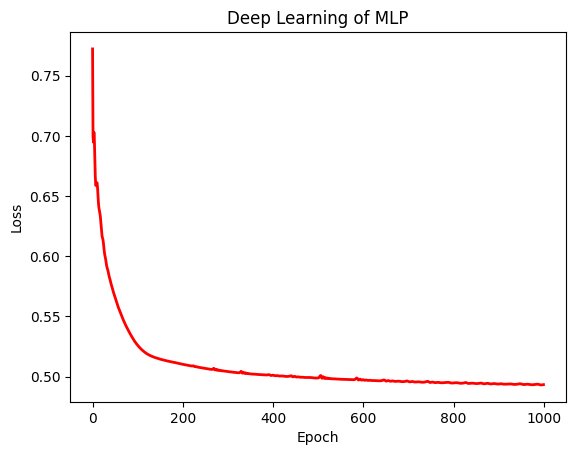

In [10]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(loss_list, linewidth=2, color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Deep Learning of MLP')
plt.show()